Middle of the Season

Positive Sentiment with Win

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Match Win (1 for win, 0 otherwise)
match_win = np.array([1,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,
                      1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1])

# Positive Sentiment Analysis Percentage
positive_sentiment = np.array([0.53,0.32,0.6,0.51,0.69,0.8,0.76,0.6,0.66,0.59,0.45,0.49,0.51,0.64,0.54,0.53,0.65,0.48,0.5,0.42,0.5,0.54,0.58,0.5,0.37,0.62,0.69,0.67,0.52,0.61,0.63,0.38,0.53,0.3,0.62,0.49,0.5,0.49,0.44,0.42,0.62,0.59,0.63,0.63,0.72,0.67,0.59,0.56,0.5,0.55,0.58,0.5,0.58,
                               0.69,0.33,0.62,0.67,0.57,0.46,0.62,0.59,0.51,0.54,0.5,0.43,0.53,0.31,0.76,0.36,0.66,0.65,0.55,0.63,0.51,0.51,0.62,0.55,0.47,0.54,0.23,0.16,0.19,0.17,0.18,0.31,0.11,0.31,0.13])

# Reshape the data to fit the model
positive_sentiment = positive_sentiment.reshape(-1, 1)
match_win = match_win.reshape(-1, 1)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(positive_sentiment, match_win.ravel())

# Calculate win probabilities for sentiment values > 0.65 and > 0.85
sentiment_values_65 = np.array([i for i in positive_sentiment if i[0] > 0.6])
sentiment_values_85 = np.array([i for i in positive_sentiment if i[0] > 0.6])

if len(sentiment_values_65) > 0:
    win_prob_65 = model.predict_proba(sentiment_values_65)[:, 1]
   
    avg_win_prob_65 = np.mean(win_prob_65)
    print(f"Average predicted win probability for sentiment values > 0.6: {avg_win_prob_65 * 100:.2f}%")
else:
    print("No sentiments with values > 0.6")

# Create an array of sentiment scores greater than 0.85
sentiment_values_above_85 = np.array([[i/100.0] for i in range(60, 101)])

# Use the model to predict win probabilities for these scores
win_probs_above_85 = model.predict_proba(sentiment_values_above_85)[:, 1]

# Print the predicted win probabilities
for sentiment, prob in zip(sentiment_values_above_85, win_probs_above_85):
    print(f"Predicted win probability for sentiment score of {sentiment[0]}: {prob * 100:.2f}%")


Average predicted win probability for sentiment values > 0.6: 41.30%
Predicted win probability for sentiment score of 0.6: 40.64%
Predicted win probability for sentiment score of 0.61: 40.75%
Predicted win probability for sentiment score of 0.62: 40.85%
Predicted win probability for sentiment score of 0.63: 40.96%
Predicted win probability for sentiment score of 0.64: 41.06%
Predicted win probability for sentiment score of 0.65: 41.17%
Predicted win probability for sentiment score of 0.66: 41.27%
Predicted win probability for sentiment score of 0.67: 41.38%
Predicted win probability for sentiment score of 0.68: 41.48%
Predicted win probability for sentiment score of 0.69: 41.59%
Predicted win probability for sentiment score of 0.7: 41.69%
Predicted win probability for sentiment score of 0.71: 41.80%
Predicted win probability for sentiment score of 0.72: 41.90%
Predicted win probability for sentiment score of 0.73: 42.01%
Predicted win probability for sentiment score of 0.74: 42.11%
Pre

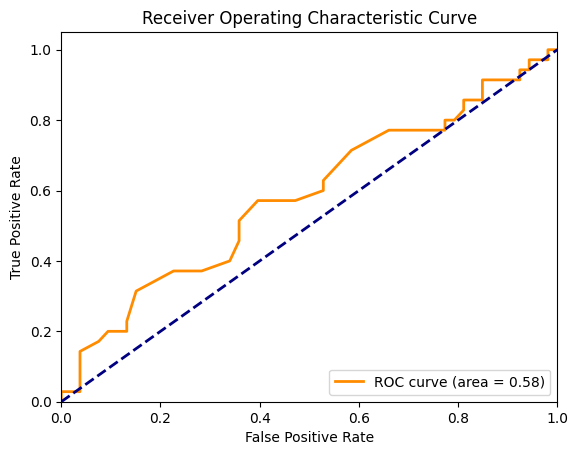

In [3]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the model to predict probabilities for the test data
probs = model.predict_proba(positive_sentiment)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(match_win, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
#1. Low PPG: 0.00 to 0.95
#2. Medium PPG: 0.95 to 1.63
#3. High PPG: 1.63 to 3.00

# High PPG (2), Medium PPG (1), Low PPG (0), Very Low PPG (-1)
PPG = np.array([2,1,0,0,-1,1,1,0,-1,1,2,2,2,-1,-1,0,2,-1,1,0])

# Positive Sentiment Analysis Percentage
positive_sentiment = np.array([0.51,0.6,0.58,0.54,0.48,0.46,0.6,0.43,0.45,0.45,0.59,0.57,0.53,0.49,0.37,0.63,0.52,0.39,0.23,0.52])

# Create and fit the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logistic_model.fit(positive_sentiment.reshape(-1, 1), PPG)

# Calculate probabilities
# Create an array of sentiment scores from 0.55 to 1
sentiment_scores = np.linspace(0.55, 1, num=10).reshape(-1, 1)

# Predict probabilities for each sentiment score
for score in sentiment_scores:
    probs = logistic_model.predict_proba([score])
    print(f"Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is {score[0]:.2f}: {probs}")


Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.55: [[0.24610312 0.25273467 0.24817904 0.25298317]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.60: [[0.24248528 0.25530272 0.24641337 0.25579864]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.65: [[0.23889119 0.25786511 0.24463012 0.25861358]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.70: [[0.23532146 0.26042121 0.24282995 0.26142739]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.75: [[0.23177666 0.26297042 0.24101349 0.26423943]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.80: [[0.22825738 0.26551215 0.23918139 0.26704908]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.85: [[0.22476415 0.2680458  0.23733431 0.26985574]]

End of Season

To-re do

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Match Win (1 for win, 0 otherwise)
match_win = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Positive Sentiment Analysis Percentage
positive_sentiment = np.array([0.67,0.5,0.73,0.72,0.89,0.71,0.75,0.76,0.88,0.74,0.71,0.75,0.54,0.46,0.75,0.82,0.44,0.46,0.71,0.75,0.72,0.85,0.56,0.68,0.68,0.44,0.7,0.72,0.77,0.78,0.75,0.53,0.74,0.76,0.75
                               ,0.59,0.8,0.66,0.29,0.62,0.76,0.78,0.57,0.72,0.7,0.78,0.73,0.39,0.48,0.65,0.86,0.7,0.5,0.6,0.69,0.74,0.83,0.62,0.74,0.72,0.64,0.55,0.55,0.65,0.77,0.42,0.43,0.51,0.7,0.66,0.69,0.69,0.85,0.76,0.86,0.73,0.68,0.62,0.67,0.64,0.45,0.66,0.53,0.77,0.54
])

# Reshape the data to fit the model
positive_sentiment = positive_sentiment.reshape(-1, 1)
match_win = match_win.reshape(-1, 1)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(positive_sentiment, match_win.ravel())

# Calculate win probabilities for sentiment values > 0.65 and > 0.85
sentiment_values_65 = np.array([i for i in positive_sentiment if i[0] > 0.6])
sentiment_values_85 = np.array([i for i in positive_sentiment if i[0] > 0.6])

if len(sentiment_values_65) > 0:
    win_prob_65 = model.predict_proba(sentiment_values_65)[:, 1]
   
    avg_win_prob_65 = np.mean(win_prob_65)
    print(f"Average predicted win probability for sentiment values > 0.6: {avg_win_prob_65 * 100:.2f}%")
else:
    print("No sentiments with values > 0.6")

# Create an array of sentiment scores greater than 0.85
sentiment_values_above_85 = np.array([[i/100.0] for i in range(60, 101)])

# Use the model to predict win probabilities for these scores
win_probs_above_85 = model.predict_proba(sentiment_values_above_85)[:, 1]

# Print the predicted win probabilities
for sentiment, prob in zip(sentiment_values_above_85, win_probs_above_85):
    print(f"Predicted win probability for sentiment score of {sentiment[0]}: {prob * 100:.2f}%")


Average predicted win probability for sentiment values > 0.6: 42.14%
Predicted win probability for sentiment score of 0.6: 40.16%
Predicted win probability for sentiment score of 0.61: 40.31%
Predicted win probability for sentiment score of 0.62: 40.46%
Predicted win probability for sentiment score of 0.63: 40.61%
Predicted win probability for sentiment score of 0.64: 40.76%
Predicted win probability for sentiment score of 0.65: 40.91%
Predicted win probability for sentiment score of 0.66: 41.06%
Predicted win probability for sentiment score of 0.67: 41.21%
Predicted win probability for sentiment score of 0.68: 41.36%
Predicted win probability for sentiment score of 0.69: 41.51%
Predicted win probability for sentiment score of 0.7: 41.66%
Predicted win probability for sentiment score of 0.71: 41.81%
Predicted win probability for sentiment score of 0.72: 41.96%
Predicted win probability for sentiment score of 0.73: 42.11%
Predicted win probability for sentiment score of 0.74: 42.26%
Pre

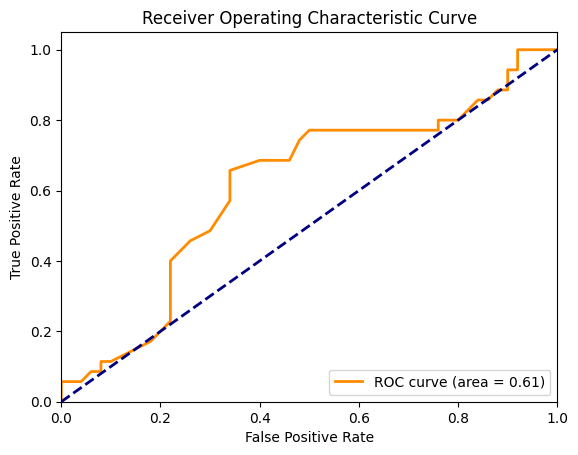

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the model to predict probabilities for the test data
probs = model.predict_proba(positive_sentiment)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(match_win, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
#1. Low PPG: 0.00 to 0.95
#2. Medium PPG: 0.95 to 1.63
#3. High PPG: 1.63 to 3.00

# High PPG (2), Medium PPG (1), Low PPG (0), Very Low PPG (-1)
PPG = np.array([0,0,2,2,2,1,1,-1,0,0,2,2,0,2,-1,-1,1,-1,0,-1])

# Positive Sentiment Analysis Percentage
positive_sentiment = np.array([0.55,0.48,0.81,0.64,0.49,0.56,0.68,0.46,0.53,0.59,0.71,0.6,0.32,0.66,0.5,0.49,0.55,0.47,0.62,0.54])

# Create and fit the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logistic_model.fit(positive_sentiment.reshape(-1, 1), PPG)

# Calculate probabilities
# Create an array of sentiment scores from 0.55 to 1
sentiment_scores = np.linspace(0.55, 1, num=10).reshape(-1, 1)

# Predict probabilities for each sentiment score
for score in sentiment_scores:
    probs = logistic_model.predict_proba([score])
    print(f"Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is {score[0]:.2f}: {probs}")


Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.55: [[0.25107072 0.30109847 0.14990907 0.29792175]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.60: [[0.24687049 0.29705227 0.15063088 0.30544637]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.65: [[0.24266332 0.29296722 0.15130802 0.31306144]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.70: [[0.23845136 0.2888457  0.15193948 0.32076346]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.75: [[0.2342368  0.28469015 0.15252427 0.32854878]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.80: [[0.23002186 0.28050308 0.15306149 0.33641357]]
Probabilities for Very Low PPG, Low PPG, Medium PPG, High PPG when positive sentiment is 0.85: [[0.2258088  0.27628708 0.1535503  0.34435381]]